# Datalytics

## Introduction
PUT INTRODUCTION HERE. IDENTIFY GOALS, SECTIONS, FINDINGS, ETC.

## Importing and Cleaning Data


In [10]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# setting table display options
pd.set_option('display.max_columns', None)

# reading the data
clients_data = pd.read_csv('clients_data_competition.csv')
orders_data = pd.read_csv('orders_data_competition.csv')

Now, we only focus on the data related to our business problem. Namely we only keep hsb clients and online transactions.

In [11]:
# keeping hsb clients only
clients_data = clients_data[clients_data['Company Name'] == 'HSB']
orders_data = orders_data[orders_data['Order Via'] == 'Online']

## Data Cleaning

We now put data in more convenient formats. We also replace the client type name with two binary columns.

In [12]:
# convert date string into datetime
clients_data['OpenDate'] = pd.to_datetime(clients_data['OpenDate'])
clients_data['BirthDate'] = pd.to_datetime(clients_data['BirthDate'])

orders_data['Order Time'] = pd.to_datetime(orders_data['Order Time'])
orders_data['Expire Date'] = pd.to_datetime(orders_data['Expire Date'])

# change client Type Name to 0 (Individual) and 1 (Companies)
clients_data['Client Type Name'] = clients_data['Client Type Name'].map({'Individuals': 0, 'Companies': 1})
clients_data['Is Dormant'] = clients_data['Is Dormant'].replace(-1, 1)
clients_data['Is Dormant'] = clients_data['Is Dormant'].astype(int)

# merge the two dataframes
merged_data = clients_data.merge(orders_data, on='Account ID')
merged_data

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity
0,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,61011,Egypt,19,Buy,2024-02-28 11:06:33,Online,1,0,2024-02-28,Executed,720,68.550,Real Estate,720,720
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.700,INDUSTRIAL,1175,1175
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.900,Industries,1000,1000
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.850,Industries,1000,1000
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.950,Industries,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838586,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811540,Egypt,30,Buy,2024-03-06 13:04:18,Online,1,0,2024-03-06,Executed,74,67.500,Industries,74,74
1838587,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811797,Egypt,6,Buy,2024-03-06 13:23:30,Online,1,0,2024-03-06,Executed,1250,3.530,Industries,1250,1250
1838588,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1977414,Egypt,9,Sell,2024-03-07 09:51:43,Online,0,1,2024-03-07,Not Executed,65,5.240,Financials,0,65
1838589,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1987832,Egypt,248,Buy,2024-03-10 14:22:37,Online,0,1,2024-03-10,Not Executed,40,1.249,INVESTMENT,0,40


## Descriptive Analysis

Now we look into the data.

In [15]:
# print min and max order time
print(merged_data['Order Time'].min())
print(merged_data['Order Time'].max())


2022-01-02 02:02:40
2024-03-10 14:29:54


In [53]:

# keep only the day in the order time
merged_data['Order in Days'] =  (merged_data['Order Time'] - merged_data['Order Time'].min()).dt.days
merged_data.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity,Order in Days
0,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,61011,Egypt,19,Buy,2024-02-28 11:06:33,Online,1,0,2024-02-28,Executed,720,68.55,Real Estate,720,720,787
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.70,INDUSTRIAL,1175,1175,2
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.90,Industries,1000,1000,3
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.85,Industries,1000,1000,3
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.95,Industries,1000,1000,3


In [75]:
# group by account id and for each account id drop all rows that have the same order in days
grouped_data = merged_data.groupby('Account ID').apply(lambda x: x.drop_duplicates(subset='Order in Days')).drop('Account ID', axis=1)
grouped_data.head()

Client ID Gender Risk Rate Company Name  Is Closed  Is Dormant  \
Account ID                                                                     
2          0          2   Male       Low          HSB          0           0   
           1          2   Male       Low          HSB          0           0   
           2          2   Male       Low          HSB          0           0   
           6          2   Male       Low          HSB          0           0   
           7          2   Male       Low          HSB          0           0   

              Is Profile Suspended  Is Client Suspended  Client Type Name  \
Account ID                                                                  
2          0                     0                    0                 0   
           1                     0                    0                 0   
           2                     0                    0                 0   
           6                     0                    0                 0   
           7                     0                    0                 0   

               OpenDate  BirthDate  Order ID Market Key  Security ID  \
Account ID                                                             
2          0 2014-02-17 1971-05-14     61011      Egypt           19   
           1 2014-02-17 1971-05-14    225079      Egypt          152   
           2 2014-02-17 1971-05-14    227773      Egypt           66   
           6 2014-02-17 1971-05-14    253939      Egypt           11   
           7 2014-02-17 1971-05-14    348662      Egypt          156   

             Order Type          Order Time Order Via  Is Completed  \
Account ID                                                            
2          0        Buy 2024-02-28 11:06:33    Online             1   
           1       Sell 2022-01-04 12:06:31    Online             1   
           2        Buy 2022-01-05 11:32:35    Online             1   
           6        Buy 2022-01-24 14:07:25    Online             1   
           7        Buy 2022-03-27 13:13:44    Online             1   

              Is Canceled Expire Date Execution Status  quantity   Price  \
Account ID                                                                 
2          0            0  2024-02-28         Executed       720  68.550   
           1            0  2022-01-04         Executed      1175   7.700   
           2            0  2022-01-05         Executed      1000   9.900   
           6            0  2022-01-24         Executed     50000   0.216   
           7            0  2022-03-27         Executed      4000   1.740   

                         Sector Name  Executed Quantity  Quantity  \
Account ID                                                          
2          0             Real Estate                720       720   
           1              INDUSTRIAL               1175      1175   
           2              Industries               1000      1000   
           6  Information Technology              50000     50000   
           7              INVESTMENT               4000      4000   

              Order in Days  
Account ID                   
2          0            787  
           1              2  
           2              3  
           6             22  
           7             84

In [76]:
print(merged_data.shape)
print(grouped_data.shape)

(1838591, 28)
(447383, 27)


In [77]:
# for each client sort the data in descending order based on order in days
grouped_data = grouped_data.sort_values(by=['Account ID', 'Order in Days'], ascending=True)
grouped_data.head()

Client ID Gender Risk Rate Company Name  Is Closed  Is Dormant  \
Account ID                                                                     
2          1          2   Male       Low          HSB          0           0   
           2          2   Male       Low          HSB          0           0   
           6          2   Male       Low          HSB          0           0   
           7          2   Male       Low          HSB          0           0   
           9          2   Male       Low          HSB          0           0   

              Is Profile Suspended  Is Client Suspended  Client Type Name  \
Account ID                                                                  
2          1                     0                    0                 0   
           2                     0                    0                 0   
           6                     0                    0                 0   
           7                     0                    0                 0   
           9                     0                    0                 0   

               OpenDate  BirthDate  Order ID Market Key  Security ID  \
Account ID                                                             
2          1 2014-02-17 1971-05-14    225079      Egypt          152   
           2 2014-02-17 1971-05-14    227773      Egypt           66   
           6 2014-02-17 1971-05-14    253939      Egypt           11   
           7 2014-02-17 1971-05-14    348662      Egypt          156   
           9 2014-02-17 1971-05-14    414606      Egypt           42   

             Order Type          Order Time Order Via  Is Completed  \
Account ID                                                            
2          1       Sell 2022-01-04 12:06:31    Online             1   
           2        Buy 2022-01-05 11:32:35    Online             1   
           6        Buy 2022-01-24 14:07:25    Online             1   
           7        Buy 2022-03-27 13:13:44    Online             1   
           9        Buy 2022-05-25 12:12:24    Online             0   

              Is Canceled Expire Date Execution Status  quantity  Price  \
Account ID                                                                
2          1            0  2022-01-04         Executed      1175  7.700   
           2            0  2022-01-05         Executed      1000  9.900   
           6            0  2022-01-24         Executed     50000  0.216   
           7            0  2022-03-27         Executed      4000  1.740   
           9            1  2022-05-27     Not Executed      4000  3.810   

                         Sector Name  Executed Quantity  Quantity  \
Account ID                                                          
2          1              INDUSTRIAL               1175      1175   
           2              Industries               1000      1000   
           6  Information Technology              50000     50000   
           7              INVESTMENT               4000      4000   
           9  Information Technology                  0      4000   

              Order in Days  
Account ID                   
2          1              2  
           2              3  
           6             22  
           7             84  
           9            143

In [78]:
# calculate the difference between the order in days for each client
grouped_data['Order in Days Diff'] = grouped_data.groupby('Account ID')['Order in Days'].diff()
grouped_data['Order in Days Diff'] = grouped_data['Order in Days Diff'].fillna(0)
grouped_data.head()


Client ID Gender Risk Rate Company Name  Is Closed  Is Dormant  \
Account ID                                                                     
2          1          2   Male       Low          HSB          0           0   
           2          2   Male       Low          HSB          0           0   
           6          2   Male       Low          HSB          0           0   
           7          2   Male       Low          HSB          0           0   
           9          2   Male       Low          HSB          0           0   

              Is Profile Suspended  Is Client Suspended  Client Type Name  \
Account ID                                                                  
2          1                     0                    0                 0   
           2                     0                    0                 0   
           6                     0                    0                 0   
           7                     0                    0                 0   
           9                     0                    0                 0   

               OpenDate  BirthDate  Order ID Market Key  Security ID  \
Account ID                                                             
2          1 2014-02-17 1971-05-14    225079      Egypt          152   
           2 2014-02-17 1971-05-14    227773      Egypt           66   
           6 2014-02-17 1971-05-14    253939      Egypt           11   
           7 2014-02-17 1971-05-14    348662      Egypt          156   
           9 2014-02-17 1971-05-14    414606      Egypt           42   

             Order Type          Order Time Order Via  Is Completed  \
Account ID                                                            
2          1       Sell 2022-01-04 12:06:31    Online             1   
           2        Buy 2022-01-05 11:32:35    Online             1   
           6        Buy 2022-01-24 14:07:25    Online             1   
           7        Buy 2022-03-27 13:13:44    Online             1   
           9        Buy 2022-05-25 12:12:24    Online             0   

              Is Canceled Expire Date Execution Status  quantity  Price  \
Account ID                                                                
2          1            0  2022-01-04         Executed      1175  7.700   
           2            0  2022-01-05         Executed      1000  9.900   
           6            0  2022-01-24         Executed     50000  0.216   
           7            0  2022-03-27         Executed      4000  1.740   
           9            1  2022-05-27     Not Executed      4000  3.810   

                         Sector Name  Executed Quantity  Quantity  \
Account ID                                                          
2          1              INDUSTRIAL               1175      1175   
           2              Industries               1000      1000   
           6  Information Technology              50000     50000   
           7              INVESTMENT               4000      4000   
           9  Information Technology                  0      4000   

              Order in Days  Order in Days Diff  
Account ID                                       
2          1              2                 0.0  
           2              3                 1.0  
           6             22                19.0  
           7             84                62.0  
           9            143                59.0

In [81]:
# for each customer calculate the average of order in days diff
grouped_data['Average Order in Days Diff'] = grouped_data.groupby('Account ID')['Order in Days Diff'].transform('mean')
grouped_data['Median Order in Days Diff'] = grouped_data.groupby('Account ID')['Order in Days Diff'].transform('median')
grouped_data['Std Order in Days Diff'] = grouped_data.groupby('Account ID')['Order in Days Diff'].transform('std')

In [83]:
grouped_data.head(-10)

Client ID Gender     Risk Rate Company Name  Is Closed  \
Account ID                                                                   
2          1                2   Male           Low          HSB          0   
           2                2   Male           Low          HSB          0   
           6                2   Male           Low          HSB          0   
           7                2   Male           Low          HSB          0   
           9                2   Male           Low          HSB          0   
...                       ...    ...           ...          ...        ...   
13502      1838041       3658   Male           Low          HSB          0   
           1838048       3658   Male           Low          HSB          0   
           1838023       3658   Male           Low          HSB          0   
           1838049       3658   Male           Low          HSB          0   
13509      1838557       9115   Male  Not Assigned          HSB          0   

                    Is Dormant  Is Profile Suspended  Is Client Suspended  \
Account ID                                                                  
2          1                 0                     0                    0   
           2                 0                     0                    0   
           6                 0                     0                    0   
           7                 0                     0                    0   
           9                 0                     0                    0   
...                        ...                   ...                  ...   
13502      1838041           0                     0                    0   
           1838048           0                     0                    0   
           1838023           0                     0                    0   
           1838049           0                     0                    0   
13509      1838557           0                     0                    0   

                    Client Type Name   OpenDate  BirthDate  Order ID  \
Account ID                                                             
2          1                       0 2014-02-17 1971-05-14    225079   
           2                       0 2014-02-17 1971-05-14    227773   
           6                       0 2014-02-17 1971-05-14    253939   
           7                       0 2014-02-17 1971-05-14    348662   
           9                       0 2014-02-17 1971-05-14    414606   
...                              ...        ...        ...       ...   
13502      1838041                 0 2011-07-17 1994-10-19     72040   
           1838048                 0 2011-07-17 1994-10-19     87797   
           1838023                 0 2011-07-17 1994-10-19     45128   
           1838049                 0 2011-07-17 1994-10-19     89003   
13509      1838557                 0 2024-02-29 1979-06-01   1809699   

                   Market Key  Security ID Order Type          Order Time  \
Account ID                                                                  
2          1            Egypt          152       Sell 2022-01-04 12:06:31   
           2            Egypt           66        Buy 2022-01-05 11:32:35   
           6            Egypt           11        Buy 2022-01-24 14:07:25   
           7            Egypt          156        Buy 2022-03-27 13:13:44   
           9            Egypt           42        Buy 2022-05-25 12:12:24   
...                       ...          ...        ...                 ...   
13502      1838041      Egypt           39       Sell 2024-03-05 11:31:57   
           1838048      Egypt           39       Sell 2024-03-06 14:08:55   
           1838023      Egypt           39       Sell 2024-03-07 12:05:38   
           1838049      Egypt           39        Buy 2024-03-10 11:02:40   
13509      1838557      Egypt            8        Buy 2024-03-06 11:16:41   

                   Order Via  Is Completed  Is Canceled Expire D

<AxesSubplot:>

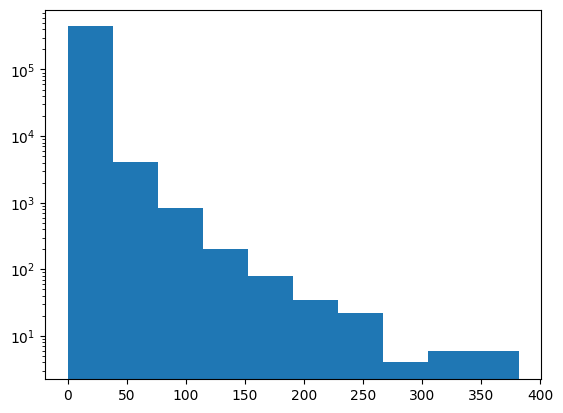

In [92]:
grouped_data['Average Order in Days Diff'].hist(log=True, grid=False)

<AxesSubplot:>

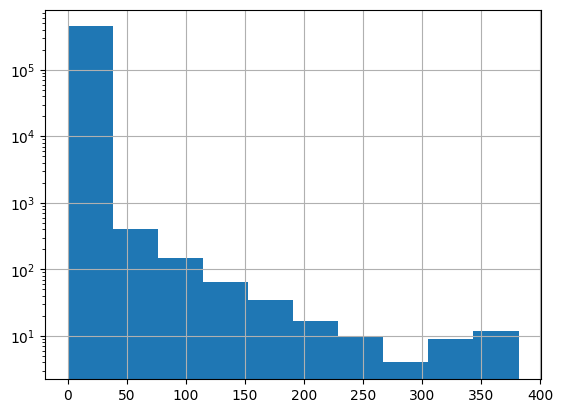

In [90]:
grouped_data['Median Order in Days Diff'].hist(log=True)

<AxesSubplot:>

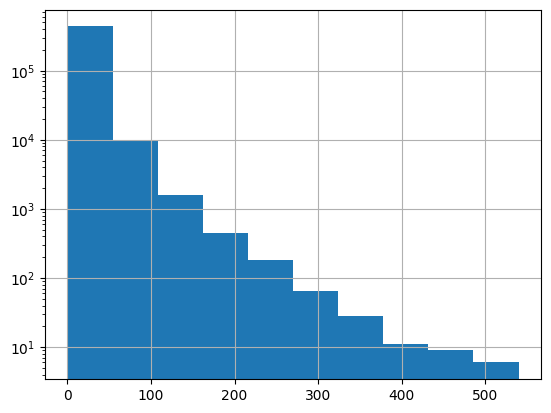

In [91]:
grouped_data['Std Order in Days Diff'].hist(log=True)

In [104]:
last_day = grouped_data['Order Time'].max()

# for each client calculate the difference between the max order time and the last day
grouped_data['Last Order'] = grouped_data.groupby('Account ID')['Order Time'].transform('max')
grouped_data['Days Since Last Order'] = (last_day - grouped_data['Last Order']).dt.days

grouped_data.head(-10)

Client ID Gender     Risk Rate Company Name  Is Closed  \
Account ID                                                                   
2          1                2   Male           Low          HSB          0   
           2                2   Male           Low          HSB          0   
           6                2   Male           Low          HSB          0   
           7                2   Male           Low          HSB          0   
           9                2   Male           Low          HSB          0   
...                       ...    ...           ...          ...        ...   
13502      1838041       3658   Male           Low          HSB          0   
           1838048       3658   Male           Low          HSB          0   
           1838023       3658   Male           Low          HSB          0   
           1838049       3658   Male           Low          HSB          0   
13509      1838557       9115   Male  Not Assigned          HSB          0   

                    Is Dormant  Is Profile Suspended  Is Client Suspended  \
Account ID                                                                  
2          1                 0                     0                    0   
           2                 0                     0                    0   
           6                 0                     0                    0   
           7                 0                     0                    0   
           9                 0                     0                    0   
...                        ...                   ...                  ...   
13502      1838041           0                     0                    0   
           1838048           0                     0                    0   
           1838023           0                     0                    0   
           1838049           0                     0                    0   
13509      1838557           0                     0                    0   

                    Client Type Name   OpenDate  BirthDate  Order ID  \
Account ID                                                             
2          1                       0 2014-02-17 1971-05-14    225079   
           2                       0 2014-02-17 1971-05-14    227773   
           6                       0 2014-02-17 1971-05-14    253939   
           7                       0 2014-02-17 1971-05-14    348662   
           9                       0 2014-02-17 1971-05-14    414606   
...                              ...        ...        ...       ...   
13502      1838041                 0 2011-07-17 1994-10-19     72040   
           1838048                 0 2011-07-17 1994-10-19     87797   
           1838023                 0 2011-07-17 1994-10-19     45128   
           1838049                 0 2011-07-17 1994-10-19     89003   
13509      1838557                 0 2024-02-29 1979-06-01   1809699   

                   Market Key  Security ID Order Type          Order Time  \
Account ID                                                                  
2          1            Egypt          152       Sell 2022-01-04 12:06:31   
           2            Egypt           66        Buy 2022-01-05 11:32:35   
           6            Egypt           11        Buy 2022-01-24 14:07:25   
           7            Egypt          156        Buy 2022-03-27 13:13:44   
           9            Egypt           42        Buy 2022-05-25 12:12:24   
...                       ...          ...        ...                 ...   
13502      1838041      Egypt           39       Sell 2024-03-05 11:31:57   
           1838048      Egypt           39       Sell 2024-03-06 14:08:55   
           1838023      Egypt           39       Sell 2024-03-07 12:05:38   
           1838049      Egypt           39        Buy 2024-03-10 11:02:40   
13509      1838557      Egypt            8        Buy 2024-03-06 11:16:41   

                   Order Via  Is Completed  Is Canceled Expire D

## Defining Churn

Defining churn is a critical step in this analysis. This however, can be tricky. No one shoe can fit all customers. Thus, we chose to have a personalized definition based on user behavior.

We analyze the trading behavior of users in terms of frequency of transactions and, based on the last time they used the application, we can say if they stopped using the app, or if they are just waiting for their investments to payoff.


In [103]:
#merge the dataframes

grouped_data['Churn'] = grouped_data['Days Since Last Order'] > grouped_data['Std Order in Days Diff'] + grouped_data['Average Order in Days Diff']
grouped_data['Churn'].sum() / len(grouped_data)
# grouped_data[['Average Order in Days Diff', 'Days Since Last Order']].describe()

grouped_data['Churn'].value_counts()



False    340336
True     107047
Name: Churn, dtype: int64

In [109]:
#get the churn for each account in the grouped data and add it to the clients data
churn = grouped_data.groupby('Account ID')['Churn'].max()
churn = churn.reset_index()
churn.columns = ['Account ID', 'Churn']
clients_data = clients_data.merge(churn, on='Account ID', how='left')


In [105]:
clients_data['Is Dormant'].value_counts()

0    10291
1     1526
Name: Is Dormant, dtype: int64

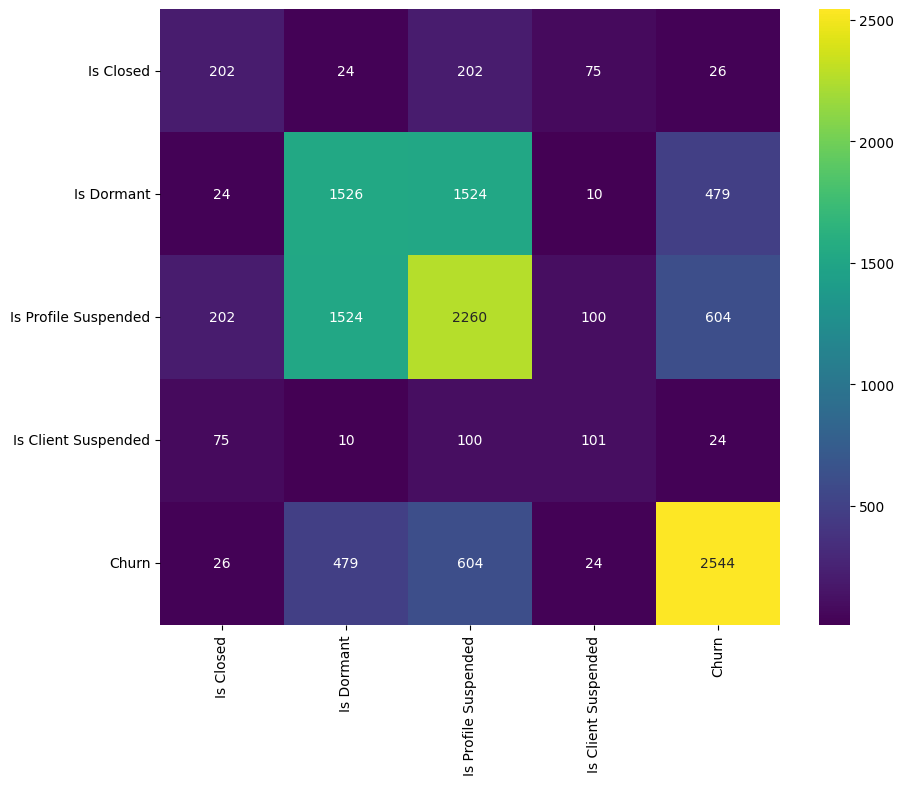

In [111]:
# Assuming that 'clients_data' is already loaded and contains the columns of interest
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended', 'Churn']
co_occurrence_matrix = pd.DataFrame(0, index=columns_to_check, columns=columns_to_check)

for i in columns_to_check:
    for j in columns_to_check:
        co_occurrence_matrix.loc[i, j] = np.logical_and(clients_data[i] == 1, clients_data[j] == 1).sum()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
# Ensure that annot is a DataFrame with the same shape as the data to force display of all numbers
sns.heatmap(co_occurrence_matrix, annot=co_occurrence_matrix, fmt="d", cmap='viridis')

plt.show()